- **Link to dataset on kaggle web site** [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

# Installing some useful Libraries and API for this project

In [ ]:
!pip install kaggle

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

In [ ]:
from google.colab import files
files.upload()

# Downloading dataset through Kaggle's API

In [ ]:
cd /root/

In [ ]:
ls

In [ ]:
!mkdir .kaggle
!mv /content/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
cd /root/.kaggle/

In [ ]:
ls

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -p /content -c titanic

In [ ]:
cd /content/

In [ ]:
ls

In [ ]:
!unzip titanic.zip

# Removing any warnings messages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries & Loading datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
# Lecture du fichier 
dataset1 = pd.read_csv("train.csv")
display(dataset1.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
dataset1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in dataset1.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  at positions  [0, 1, 2, 5, 6, 7, 9]
Found categorical features  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']  at positions  [3, 4, 8, 10, 11]


Variable cible = 'Survived'

Variables explicatives = 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

Variables numériques = 'PassengerId', 'Age', SibSp', 'Parch', 'Fare'

Variables catégorielles = 'Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'


In [ ]:
len(dataset1['Name'].tolist())

In [8]:
def fonction(df):
    Rename = []
    #pattern = re.compile(r'(\w+,\s)(Mr.|Mrs.|Miss.|\s)*(\w+)')
    pattern = re.compile(r'(\w+.\s)(Mr.|Mrs.|Miss.)?')
    for i in df['Name'].tolist():
        test = pattern.search(str(i))
        if test==None:
            Rename.append('N/A')
        else:   
            #Rename.append(test.string)
            Rename.append((test.group(1), test.group(2)))
            
            
            
        #Rename.append(test.string)
        #test = pattern.finditer(str(i))
       # for x in test: 
        #    Rename.append((x.group(1),x.group(2)))
        #if test==None:
         #   Rename.append('N/A')
        #else:   
         #   Rename.append(test.string)
       
            

    return Rename

In [9]:
fonction(dataset1)

[('Braund, ', 'Mr.'),
 ('Cumings, ', 'Mrs'),
 ('Heikkinen, ', 'Miss.'),
 ('Futrelle, ', 'Mrs'),
 ('Allen, ', 'Mr.'),
 ('Moran, ', 'Mr.'),
 ('McCarthy, ', 'Mr.'),
 ('Palsson, ', None),
 ('Johnson, ', 'Mrs'),
 ('Nasser, ', 'Mrs'),
 ('Sandstrom, ', 'Miss.'),
 ('Bonnell, ', 'Miss.'),
 ('Saundercock, ', 'Mr.'),
 ('Andersson, ', 'Mr.'),
 ('Vestrom, ', 'Miss.'),
 ('Hewlett, ', 'Mrs'),
 ('Rice, ', None),
 ('Williams, ', 'Mr.'),
 ('Vander ', None),
 ('Masselmani, ', 'Mrs'),
 ('Fynney, ', 'Mr.'),
 ('Beesley, ', 'Mr.'),
 ('McGowan, ', 'Miss.'),
 ('Sloper, ', 'Mr.'),
 ('Palsson, ', 'Miss.'),
 ('Asplund, ', 'Mrs'),
 ('Emir, ', 'Mr.'),
 ('Fortune, ', 'Mr.'),
 ('Dwyer, ', 'Miss.'),
 ('Todoroff, ', 'Mr.'),
 ('Uruchurtu, ', None),
 ('Spencer, ', 'Mrs'),
 ('Glynn, ', 'Miss.'),
 ('Wheadon, ', 'Mr.'),
 ('Meyer, ', 'Mr.'),
 ('Holverson, ', 'Mr.'),
 ('Mamee, ', 'Mr.'),
 ('Cann, ', 'Mr.'),
 ('Vander ', None),
 ('Yarred, ', 'Miss.'),
 ('Ahlin, ', 'Mrs'),
 ('Turpin, ', 'Mrs'),
 ('Kraeff, ', 'Mr.'),
 ('Laroche,

In [10]:
rename = fonction(dataset1)
print(len(rename))
print(len(dataset1))

891
891


In [11]:
rename = fonction(dataset1)
dataset1['Rename']=rename
dataset1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rename
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,"(Montvila, , None)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,"(Graham, , Miss.)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,"(Johnston, , Miss.)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,"(Behr, , Mr.)"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,"(Dooley, , Mr.)"


# Data Viz

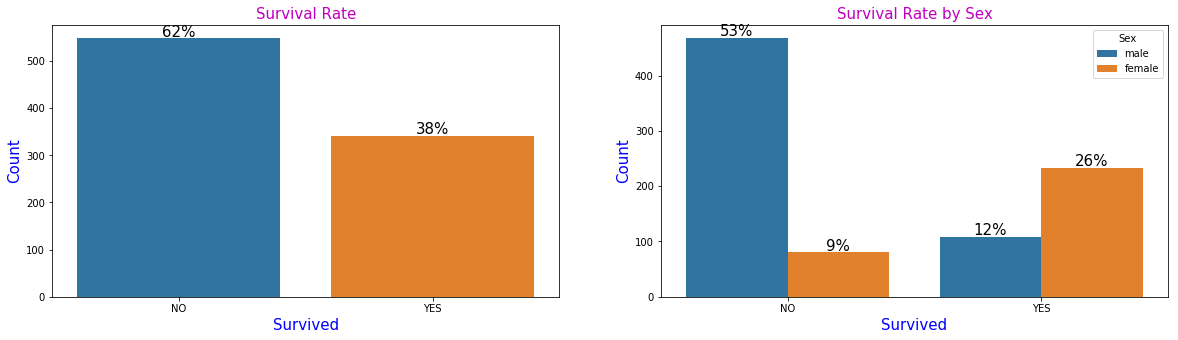

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,5), sharex=True, constrained_layout=False)

sns.countplot(x="Survived", data=dataset1, ax=ax[0])
plt.xticks(np.arange(2), ('NO', 'YES'))
ax[0].set_xlabel("Survived", fontsize=15, color='b')
ax[0].set_ylabel("Count", fontsize=15, color='b')
ax[0].set_title("Survival Rate", fontsize=15, color='m')

sns.countplot(x="Survived", data=dataset1, hue="Sex", ax=ax[1])
plt.xticks(np.arange(2), ('NO', 'YES') )
ax[1].set_xlabel("Survived", fontsize=15, color='b')
ax[1].set_ylabel("Count", fontsize=15, color='b')
ax[1].set_title("Survival Rate by Sex", fontsize=15, color='m')


for o in range(2):
    for p in ax[o].patches:
      total = float(len(dataset1))
      height = p.get_height()
      ax[o].text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()

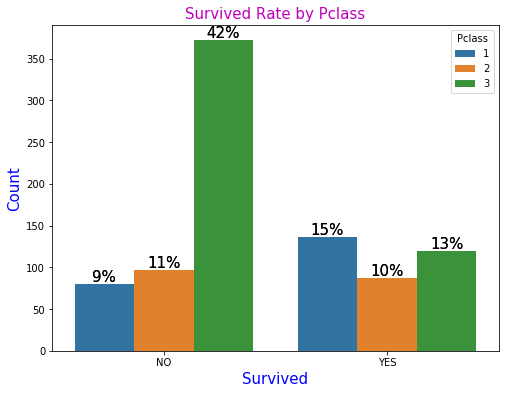

In [13]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Survived", data=dataset1, hue="Pclass", ax=ax)
plt.title('Survived Rate by Pclass', fontsize=15, color='m')
plt.xlabel('Survived', fontsize=15, color='b')
plt.ylabel('Count', fontsize=15, color='b')
plt.xticks(np.arange(2), ('NO', 'YES'))
for k in range(2):
    for p in ax.patches:
      total = float(len(dataset1))
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()

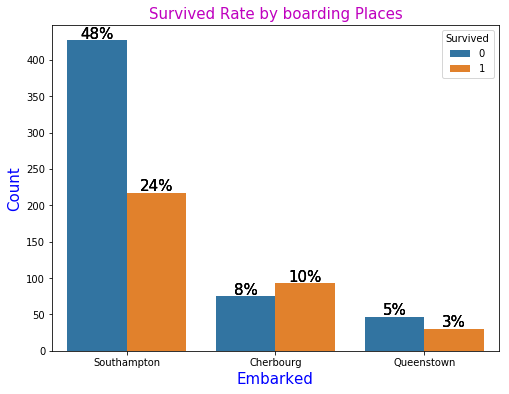

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=dataset1, x="Embarked", hue='Survived', ax=ax )
plt.title('Survived Rate by boarding Places', fontsize=15, color='m')
plt.xlabel('Embarked', fontsize=15, color='b')
plt.ylabel('Count', fontsize=15, color='b')
plt.xticks(np.arange(3), ('Southampton', 'Cherbourg', 'Queenstown'))
for k in range(3):
    for p in ax.patches:
      total = float(len(dataset1))
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

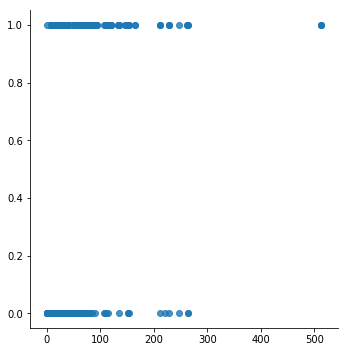

In [15]:
sns.lmplot(x="Fare", y="Survived", data=dataset1, logistic=True)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

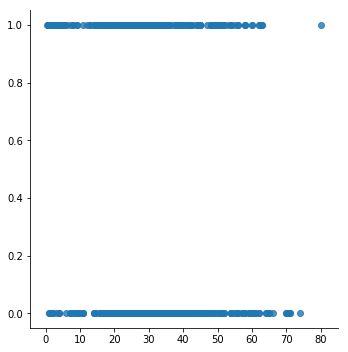

In [16]:
sns.lmplot(x="Age", y="Survived", data=dataset1, logistic=True)
plt.show()

# Features Extraction

In [17]:
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rename
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(Braund, , Mr.)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(Cumings, , Mrs)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(Heikkinen, , Miss.)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(Futrelle, , Mrs)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(Allen, , Mr.)"


In [18]:
dataset1=dataset1.drop(['Rename'], axis=1)

In [ ]:
# Selection des variables
dataset1 = dataset1.loc[:, ["Survived", 
                          "Pclass", 
                          "Sex", 
                          "Age", 
                          "SibSp", 
                          "Parch",
                          "Fare",
                          "Embarked"]]
dataset1.head()

In [ ]:
dataset2 = dataset2.loc[:, [ 
                          "Pclass", 
                          "Sex", 
                          "Age", 
                          "SibSp", 
                          "Parch",
                          "Fare",
                          "Embarked"]]
dataset2.head()

In [ ]:
# Gestion des NaN 
# Enlever la colonne ID
# dataset = dataset.iloc[:, 1:]
# dataset = dataset.drop(['User ID'], axis=1)

In [ ]:
# Remplacement des NaN dans la colonne 'Age' par la mediane des âges
dataset1['Age'].fillna(value = dataset1['Age'].median(), inplace=True)
dataset1.isnull().any()

In [19]:
dataset1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Remplacement des NaN dans la colonne 'Embarked' par 'S'
dataset1['Embarked'].fillna("S" , inplace=True)

In [ ]:
# Dummyfication 
dataset1 = pd.get_dummies(dataset1, drop_first=True)
dataset1.head()

In [ ]:
#Test delete Embarked_Q and Parch columns
dataset1.drop(["Parch", "Embarked_Q"], axis=1, inplace=True)

In [ ]:
dataset1.isnull().any()

In [ ]:
#dataset2 -- test-set
dataset2.isnull().any()

In [ ]:
# Remplacement des NaN dans la colonne 'Age' par la mediane des âges
dataset2['Age'].fillna(value=dataset2['Age'].median(), inplace=True)
dataset2.isnull().any()

In [ ]:
# Remplacement des NaN dans la colonne 'Fare' par la median des 'Fare'
dataset2['Fare'].fillna(value=dataset2['Fare'].median(), inplace=True)
dataset2.isnull().any()

In [ ]:
# Dummyfication
dataset2 = pd.get_dummies(data=dataset2, drop_first=True)
dataset2.head()

In [ ]:
#Test delete Embarked_Q and Parch columns
dataset2.drop(["Parch", "Embarked_Q"], axis=1, inplace=True)

In [ ]:
# Séparation des X & y pour le train-set:
X_t = dataset1.iloc[:,1:]
y_t = dataset1.iloc[:, 0]

In [ ]:
# Feature Scaling, Normalisation:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_t = sc_x.fit_transform(X_t)



In [ ]:
 #Train_test_split:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [ ]:
# Application du modèle
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
y_train_pred = classifier.predict(X_train)

In [ ]:
y_test_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, classification_report

In [ ]:
f1_score(y_test, y_test_pred)

In [ ]:
# Parch en Embarked_Q deleted
f1_score(y_test, y_test_pred)

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
# Parch en Embarked_Q deleted
print(classification_report(y_test, y_test_pred))

In [ ]:
# Evaluation du modèle
# NB Nous ne disposons pas des valeurs réelles de y_test, donc le score serait de 100%
print("Train score : {}".format(classifier.score(X_train , y_train)*100))
print("Test score : {}".format(classifier.score(X_test , y_test)*100))

In [ ]:
# Prédiction de y_test
X_test_kaggle = dataset2
y_test_kaggle_pred = classifier.predict(X_test_kaggle)

In [ ]:
y_test_kaggle_pred

In [ ]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm

In [ ]:
# Visualisation
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(cm, annot=True, fmt='.2f' ) 
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Matrice de confusion du train-set")
plt.show()

In [ ]:
classifier.coef_.squeeze()

Features importance

In [ ]:
coef = pd.DataFrame((abs(classifier.coef_.squeeze())).T, index=X_test_kaggle.columns, columns=['abs_coef'])
coef

In [ ]:
coef['abs_coef'].sort_values(ascending=False)

In [ ]:
X_test_kaggle.columns

In [ ]:
# Test-set Feature importance 
imp = pd.DataFrame({"Features": ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"],
              "Values": abs(classifier.coef_.squeeze())})
imp.sort_values( by ="Values", ascending=False)

# Les femmes et les enfants d'abord, sans oublié les plus aisés!

En effet, nous pouvons constater avec stupéfaction que le top 3 des variables qui o ayant le plus d'impact dans la survie des passagers du titanic est : le sexe(Sex_male), la classe (Pclasse) ainsi que l'Age.  

In [ ]:
# Matrice de corrélation du train-set
corr = dataset1.corr()
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Matrice de corrélation du train-set")
plt.show()

In [ ]:
Survied = pd.DataFrame(data = y_test, columns = ["Survied"])
Survied.to_csv("y_test.csv")
Survied.head()

In [ ]:
# Reconstitution du test_set en incluant la colonne Survived
test_set = pd.concat((Survied, dataset2), axis=1)
test_set.head()

In [ ]:
S= test_set.iloc[:, 0]
G= test_set.iloc[:, 6]

In [ ]:
gender_submission_test = pd.concat((S, G), axis=1)
gender_submission_test.head()

In [ ]:
### Exportation de test_set de jupyter sous format csv 
test_set.to_csv("gender_submission_test.csv")

In [ ]:
# Amélioration de la prédiction
# Création d'un modèle d'arbres de decisions
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# Prédiction de y_test avec le modèle d'arbres de decisions
X_test = dataset2
y_test = classifier.predict(X_test)

In [ ]:
# Evaluation du modèle en pourcentage
print("Train Score : {}".format(classifier.score(X_train, y_train)*100))
print('Test Score : {}'.format(classifier.score(X_test, y_test)*100))

Nous constatons une nette amélioration de la prédiction du modèle.

In [ ]:
# Tentons d'appliquer un autre modèle : le random forest 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# Prédiction de y_test avec le random forest
X_test = dataset2
y_test = classifier.predict(X_test)

In [ ]:
# Evaluation du modèle en pourcentage
print("Train Score : {}".format(classifier.score(X_train, y_train)*100))
print('Test Score : {}'.format(classifier.score(X_test, y_test)*100))

Nous obtenons le même score qu'avec l'arbre de décision

In [ ]:
# Tentons de mettre plus d'arbres dans le random forest
classifier = RandomForestClassifier(n_estimators = 300, max_depth=20)
classifier.fit(X_train, y_train)

In [ ]:
# Prediction of y_test
X_test = dataset2
y_test = classifier.predict(X_test)

In [ ]:
# Evaluation du modèle en pourentage
print("Train Score : {}".format(classifier.score(X_train, y_train)*100))
print('Test Score : {}'.format(classifier.score(X_test, y_test)*100))

Nous obtenons les mêmes scores qu'avec les deux modèles précédents, nous pouvons alors supposer que le modèle a atteint son maximum de précision.
Il faut garder à l'esprit que nous ne pouvons pas atteindre les 100% dans une prédiction, étant que le modèle ne sera jamais parfait.
Les 100% du Test s'explique par le fait qu'il a été comparé à lui-même. Le Test doit être soumis à Kaggle afin d'évaluer sa précision.